<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/Logistic_regression/Lab_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Titanic - Machine Learning from Disaster</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Titanic Problem</a>  
4. <a href="#item34">Análisis y tratamiento de variables</a>  
5. <a href="#item34">Regresión Logística</a>  
6. <a href="#item34">Elastic Net</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión logística.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión logística.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Descargar y limpiar Dataset


Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:
# Imports comunes
import pandas as pd
import numpy as np


In [2]:
# Configuración de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})


## Esta es la legendaria competencia Titanic ML



El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<img src="https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué tipo de personas tenían más probabilidades de sobrevivir? </div>


<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


## 1. Descargar y explorar Dataset


In [3]:
# Cargar Data
data = pd.read_csv("train_titanic.csv")

In [4]:
# Definiendo variable target
target = 'Survived'

Analizando la variable Target

<ipython-input-5-44c127746260>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=data, palette='hls')
<ipython-input-5-44c127746260>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Sí'], fontsize=10)


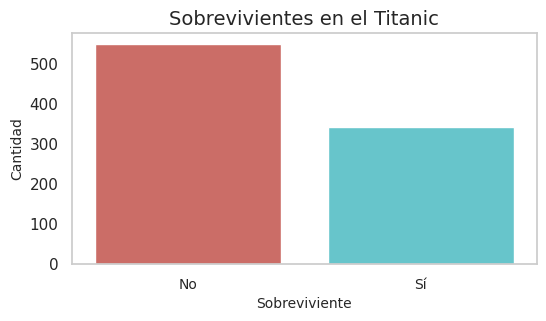

In [5]:
sns.set(style="whitegrid")  # Establece el estilo
plt.figure(figsize=(6, 3))  # Tamaño

# Crea un countplot
ax = sns.countplot(x='Survived', data=data, palette='hls')

# Personaliza el gráfico
ax.set_title('Sobrevivientes en el Titanic', fontsize=14)
ax.set_xlabel('Sobreviviente', fontsize=10)
ax.set_ylabel('Cantidad', fontsize=10)
ax.set_xticklabels(['No', 'Sí'], fontsize=10)
ax.yaxis.grid(False)

# Muestra el gráfico
plt.show()

Tambié se puede analizar la data de forma exploratoria con tablas descriptivas.

In [6]:
data.groupby(['Pclass']).agg({"PassengerId":"count",
                              "Fare" :"mean",
                              "Age" : "mean",
                              "Survived" : "mean"}).reset_index()


,Pclass,PassengerId,Fare,Age,Survived
0,1,216,84.154687,38.233441,0.629630
1,2,184,20.662183,29.877630,0.472826
2,3,491,13.675550,25.140620,0.242363


## 2. Análisis exploratorio (EDA)

<b>Analizando variables categóricas</b>


<ipython-input-7-eaead8311ce6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex', data=data, palette='hls')
<ipython-input-7-eaead8311ce6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'], fontsize=10)


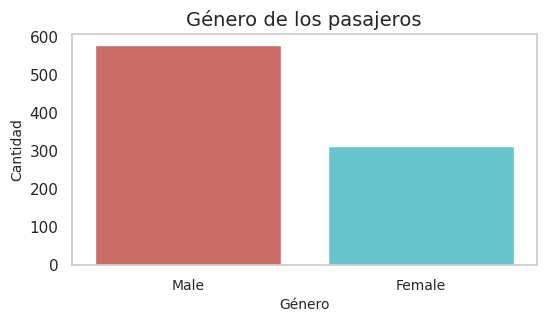

In [7]:
plt.figure(figsize=(6, 3))  # Tamaño

# Crea un countplot
ax = sns.countplot(x='Sex', data=data, palette='hls')

# Personaliza el gráfico
ax.set_title('Género de los pasajeros', fontsize=14)
ax.set_xlabel('Género', fontsize=10)
ax.set_ylabel('Cantidad', fontsize=10)
ax.set_xticklabels(['Male', 'Female'], fontsize=10)
ax.yaxis.grid(False)

# Muestra el gráfico
plt.show()

In [8]:
res = data.groupby(['Sex']).agg({"PassengerId":"count",
                           "Survived" :"mean"}).reset_index()
res

,Sex,PassengerId,Survived
0,female,314,0.742038
1,male,577,0.188908


<ipython-input-9-3dd09a48ce21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, ax=ax1, palette='hls')


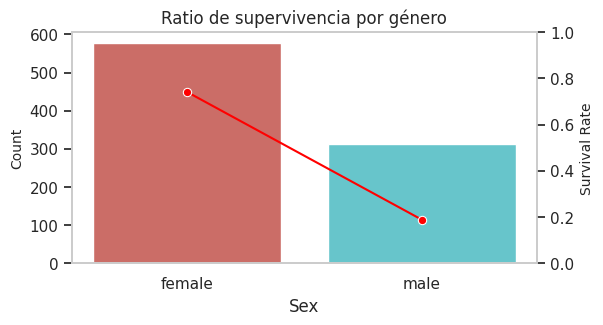

In [9]:
# Countplot
fig, ax1 = plt.subplots(figsize=(6, 3))
sns.countplot(x='Sex', data=data, ax=ax1, palette='hls')

# Configurar el eje Y para contar PassengerId
ax1.set_ylabel('Count', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para Survived
sns.lineplot(x='Sex', y='Survived', data=res, ax=ax2, color='red', marker='o', sort=False, errorbar=None)

# Configurar el eje Y para el Survived
ax2.set_ylabel('Survival Rate', fontsize=10)
ax2.set_ylim(0, 1)  # La tasa de supervivencia varía entre 0 y 1

# Añadir título
plt.title('Ratio de supervivencia por género', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Mostrar el gráfico
plt.show()

In [10]:
res = data.groupby(['Pclass']).agg({"PassengerId":"count",
                                   "Survived" :"mean"}).reset_index()
res

,Pclass,PassengerId,Survived
0,1,216,0.629630
1,2,184,0.472826
2,3,491,0.242363


<b>Analizando variables numéricas</b>




### Discretización Personalizada

In [11]:
from math import isnan

# defino los cortes
def catedad(x):
  if isnan(x):
    return 'missing'
  elif x <= 18:
    return 'a. <=18'
  elif x <= 30:
    return 'b. 18-30'
  elif x <= 45:
    return 'c. 30-45'
  elif x <= 50:
    return 'd. 45-50'
  else:
    return 'e. >50'

In [12]:
# Aplicando categorizacion personalizada
temp = data.copy()
temp = temp.dropna()
temp['edad_cat'] = data.Age.apply(lambda x: catedad(x))

In [13]:
# Calculando la tasa de supervivencia por categoría de edad
survived_rate = temp.groupby('edad_cat').agg(
    PassengerId_count=('PassengerId', 'count'),
    Survived_rate=('Survived', 'mean')).reset_index()

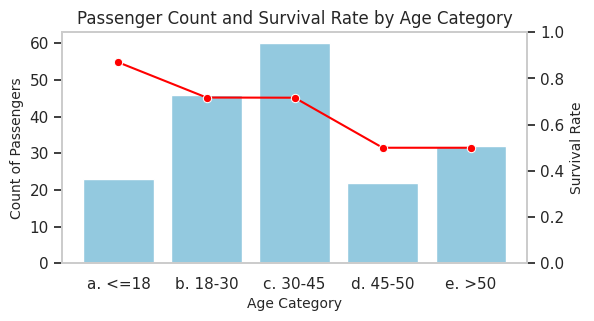

In [14]:
# Crear un gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(6, 3))

# Barras para el conteo de PassengerId
sns.barplot(x='edad_cat', y='PassengerId_count', data=survived_rate, ax=ax1, color='skyblue')

# Configurar el eje Y para el conteo de PassengerId
ax1.set_ylabel('Count of Passengers', fontsize=10)
ax1.set_xlabel('Age Category', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para la tasa de supervivencia
sns.lineplot(x='edad_cat', y='Survived_rate', data=survived_rate, ax=ax2, color='red', marker='o')

# Configurar el eje Y para la tasa de supervivencia
ax2.set_ylabel('Survival Rate', fontsize=10)
ax2.set_ylim(0, 1)

# Añadir título
plt.title('Passenger Count and Survival Rate by Age Category', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Mostrar el gráfico
plt.show()

In [15]:
temp.groupby(['edad_cat']).agg({"PassengerId":"count", "Survived" :"mean"}).reset_index()

,edad_cat,PassengerId,Survived
0,a. <=18,23,0.869565
1,b. 18-30,46,0.717391
2,c. 30-45,60,0.716667
3,d. 45-50,22,0.500000
4,e. >50,32,0.500000


### Discretización Uniforme

In [16]:
# Discretizar variable con kBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

data['Age_cat'] = KBinsDiscretizer(n_bins = 6, # Número de cortes o bins
                                   encode = 'ordinal', # Tipo de codificación que se le dará a la variable creada
                                   strategy = "uniform" # método de discretización
                                   ).fit_transform(data[['Age']].fillna(data[['Age']].mean()))


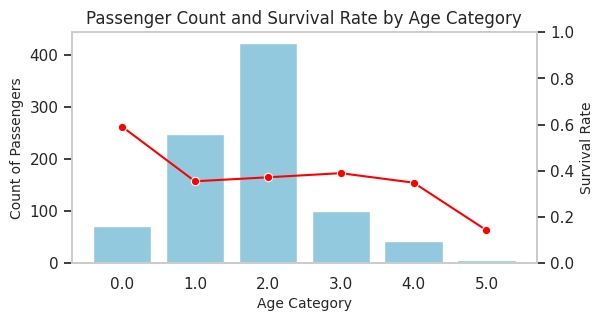

In [17]:
# Calculando la tasa de supervivencia por categoría de edad
survived_rate = data.groupby('Age_cat').agg(
    PassengerId_count=('PassengerId', 'count'),
    Survived_rate=('Survived', 'mean')).reset_index()

# Crear un gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(6, 3))

# Barras para el conteo de PassengerId
sns.barplot(x='Age_cat', y='PassengerId_count', data=survived_rate, ax=ax1, color='skyblue')

# Configurar el eje Y para el conteo de PassengerId
ax1.set_ylabel('Count of Passengers', fontsize=10)
ax1.set_xlabel('Age Category', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para la tasa de supervivencia
sns.lineplot(x='Age_cat', y='Survived_rate', data=survived_rate, ax=ax2, color='red', marker='o')

# Configurar el eje Y para la tasa de supervivencia
ax2.set_ylabel('Survival Rate', fontsize=10)
ax2.set_ylim(0, 1)

# Añadir título
plt.title('Passenger Count and Survival Rate by Age Category', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Mostrar el gráfico
plt.show()

### Discretización Quantile

In [18]:
# Discretizar variable con kBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

data['Age_cat'] = KBinsDiscretizer(n_bins = 6, # Número de cortes o bins
                                   encode = 'ordinal', # Tipo de codificación que se le dará a la variable creada
                                   strategy = "quantile" # método de discretización
                                   ).fit_transform(data[['Age']].fillna(data[['Age']].mean()))


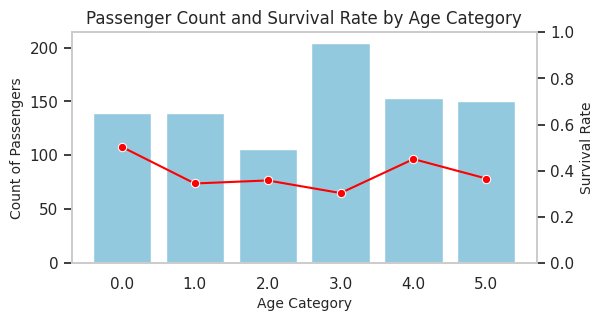

In [19]:
# Calculando la tasa de supervivencia por categoría de edad
survived_rate = data.groupby('Age_cat').agg(
    PassengerId_count=('PassengerId', 'count'),
    Survived_rate=('Survived', 'mean')).reset_index()

# Crear un gráfico de barras con dos ejes
fig, ax1 = plt.subplots(figsize=(6, 3))

# Barras para el conteo de PassengerId
sns.barplot(x='Age_cat', y='PassengerId_count', data=survived_rate, ax=ax1, color='skyblue')

# Configurar el eje Y para el conteo de PassengerId
ax1.set_ylabel('Count of Passengers', fontsize=10)
ax1.set_xlabel('Age Category', fontsize=10)

# Crear un segundo eje para la línea
ax2 = ax1.twinx()

# Gráfico de línea para la tasa de supervivencia
sns.lineplot(x='Age_cat', y='Survived_rate', data=survived_rate, ax=ax2, color='red', marker='o')

# Configurar el eje Y para la tasa de supervivencia
ax2.set_ylabel('Survival Rate', fontsize=10)
ax2.set_ylim(0, 1)

# Añadir título
plt.title('Passenger Count and Survival Rate by Age Category', fontsize=12)
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Mostrar el gráfico
plt.show()

Análisis de sentidos por segmento

<Axes: xlabel='Age_cat', ylabel='Survived'>

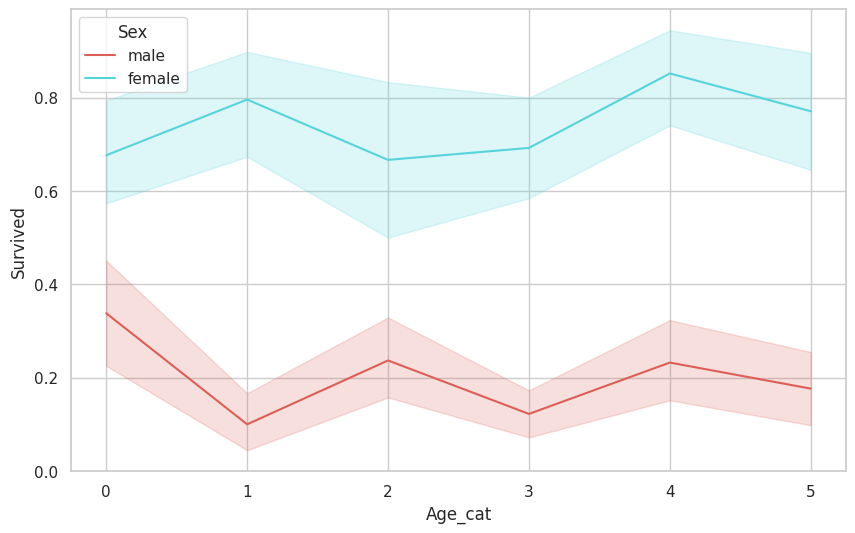

In [20]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Age_cat", y="Survived", palette = 'hls', hue = 'Sex')

*Es interesante notar como el sentido del target varia den distintos segmentos

## 3. Muestreo Train/Test

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0


In [34]:
# Muestreo de data
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data[['Survived', 'Sex']],
                               test_size = 0.3,
                               random_state = 123)


In [35]:
train.Survived.mean()

0.38362760834670945

In [36]:
test.Survived.mean()

0.3843283582089552

In [37]:
train.groupby('Sex').size()/len(train)

Sex
female    0.35313
male      0.64687
dtype: float64

In [38]:
test.groupby('Sex').size()/len(test)

Sex
female    0.350746
male      0.649254
dtype: float64

## 4.  Tratamiento de variables categoricas

In [39]:
#Variables

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']


In [40]:
data[catFeatures].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


### Encoding de variables categóricas


---

<h3>Label Encoding</h3>

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3>

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3>

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 500px; height: 350px;">

---


In [ ]:
# Tratamiento de variables categóricas

In [41]:
# Rellenado de missings
data[catFeatures].fillna('missing', inplace = True)

<ipython-input-41-fef44b3a8860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[catFeatures].fillna('missing', inplace = True)


In [42]:
data[catFeatures].drop_duplicates().head(20)

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


In [43]:
# Como se nos escapan algunos missings reemplazamos las filas NaN por una categoría específica para missings
for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

data[catFeatures].drop_duplicates()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


<h3>One Hot Encoding</h3>

In [44]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder(sparse_output = True # Cambia el formato del output a dataframe o array
                              )


In [45]:
# Aplicamos one hot encoder
OneHotEncoder.fit(train[catFeatures])

train[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(train[catFeatures]).toarray()
test[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(test[catFeatures]).toarray()


In [46]:
train[['Sex', 'Sex_female', 'Sex_male']].head()

,Sex,Sex_female,Sex_male
634,female,1.0,0.0
316,female,1.0,0.0
178,male,0.0,1.0
67,male,0.0,1.0
451,male,0.0,1.0


<h3>Target Encoding</h3>

In [47]:
%%capture
!pip install category_encoders

In [48]:
# Aplicando category encoders
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist', # Qué hacer con categorias nuevas desconocidas
                        handle_missing = 'value', # Qué hacer con missings
                        min_samples_leaf = 30) # Cantidad mínima de N por categoría


In [49]:
encoder.fit(train[catFeatures].astype('category'), train[target])

train[[x + '_coded' for x in catFeatures]] = encoder.transform(train[catFeatures].astype('category'))
test[[x + '_coded' for x in catFeatures]] = encoder.transform(test[catFeatures].astype('category'))


In [50]:
test[['Sex','Sex_coded']].drop_duplicates()

,Sex,Sex_coded
190,female,0.740909
547,male,0.188586


In [51]:
test[['Pclass','Pclass_coded']].drop_duplicates()


,Pclass,Pclass_coded
190,2,0.462684
539,1,0.633332
208,3,0.241888


## 5. Análisis univariado

In [52]:

# Creando métricas de las variables

univariate = train[numFeatures].describe(percentiles = [0.01, 0.25, 0.5, 0.75, 0.99]).transpose()
univariate.reset_index(inplace = True)
univariate.rename(columns = {'index':'feature',
                             '1%': 'P1',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3',
                             '99%': 'P99'}, inplace = True)

univariate[['missing_rate']] = 1 - univariate[['count']]/train.shape[0]
univariate.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [53]:
univariate.head()

,feature,count,mean,std,min,P1,Q1,median,Q3,P99,max,missing_rate
0,Age,491.0,29.333686,14.881960,0.42,0.911,20.000,28.0,39.0000,65.000000,80.0000,0.211878
1,Fare,623.0,31.807898,49.017046,0.00,0.000,7.925,14.5,30.5979,243.121724,512.3292,0.000000
2,SibSp,623.0,0.491172,0.993307,0.00,0.000,0.000,0.0,1.0000,4.000000,8.0000,0.000000
3,Parch,623.0,0.394864,0.838065,0.00,0.000,0.000,0.0,0.0000,4.000000,6.0000,0.000000


## 6. Tratamiento de variables numéricas




In [60]:
# Tratamiento de outliers por Z-score

univariate['li_per'] = univariate['mean'] - 1.96*univariate['std']
univariate['ls_per'] = univariate['mean'] + 1.96*univariate['std']


In [61]:
# capping de outliers por Z-score

def z_score(dataframe, univariate, featuresToTreat):
  for col in featuresToTreat:
    desc = univariate.loc[univariate.feature == col]
    dataframe[col + '_zscore'] = dataframe[col].apply(lambda x: desc.ls_per.values[0] if x > desc.ls_per.values[0]
                                                            else desc.li_per.values[0] if x < desc.li_per.values[0]
                                                            else x)
  return dataframe


In [62]:
train_I = z_score(train, univariate, univariate.feature.tolist())
test_I  = z_score(test,  univariate, univariate.feature.tolist())

<Axes: ylabel='Age'>

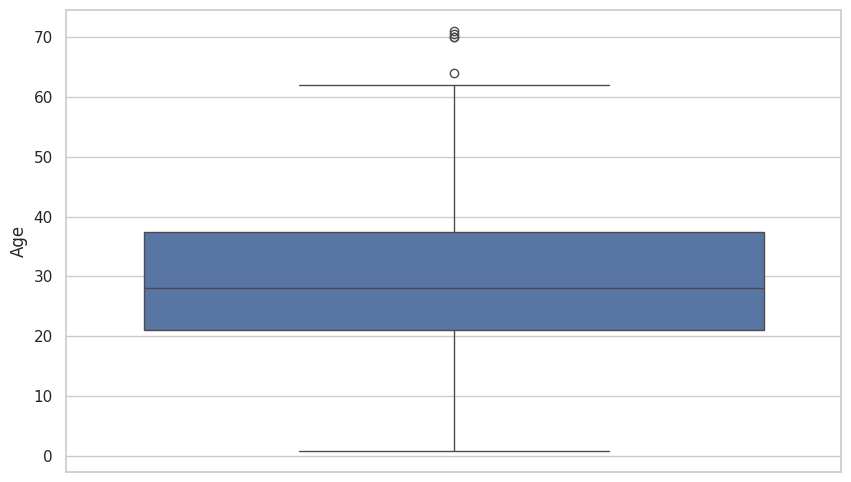

In [63]:
sns.boxplot(test.Age)

<Axes: ylabel='Age_zscore'>

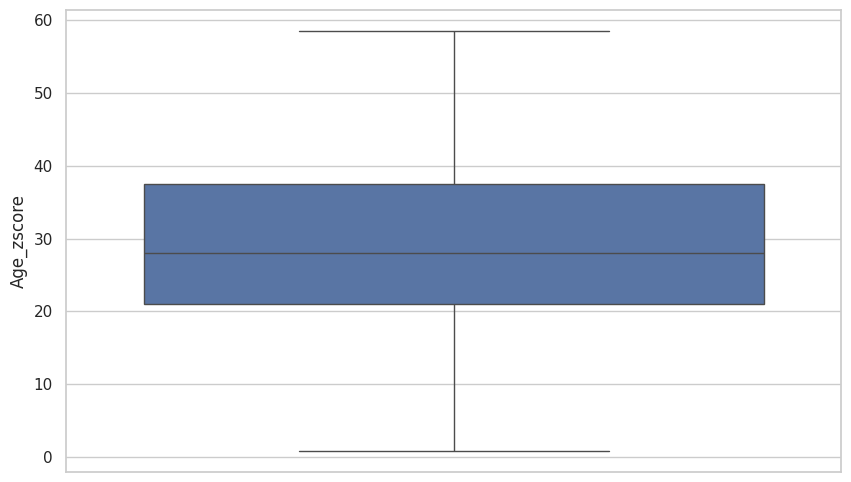

In [64]:
sns.boxplot(test_I.Age_zscore)

In [65]:
test_I.Age_zscore.describe()

count    223.000000
mean      30.225789
std       13.017567
min        0.830000
25%       21.000000
50%       28.000000
75%       37.500000
max       58.502329
Name: Age_zscore, dtype: float64

<Axes: >

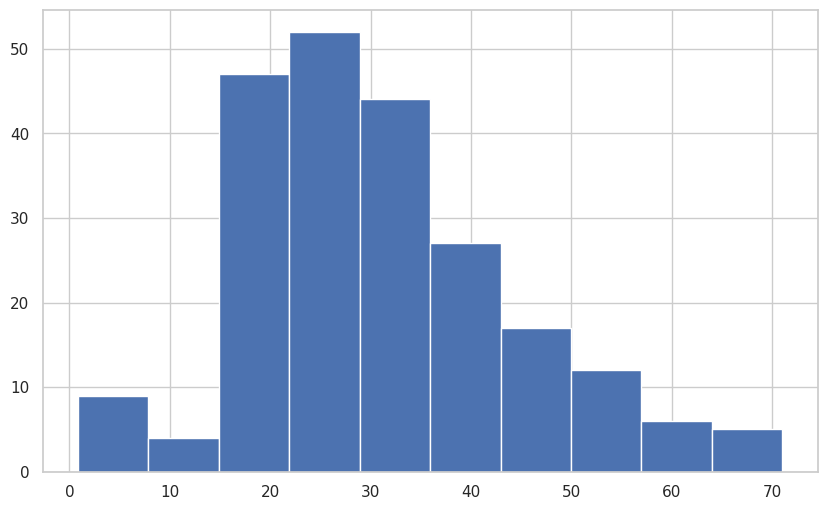

In [66]:
test_I.Age.hist()

<Axes: >

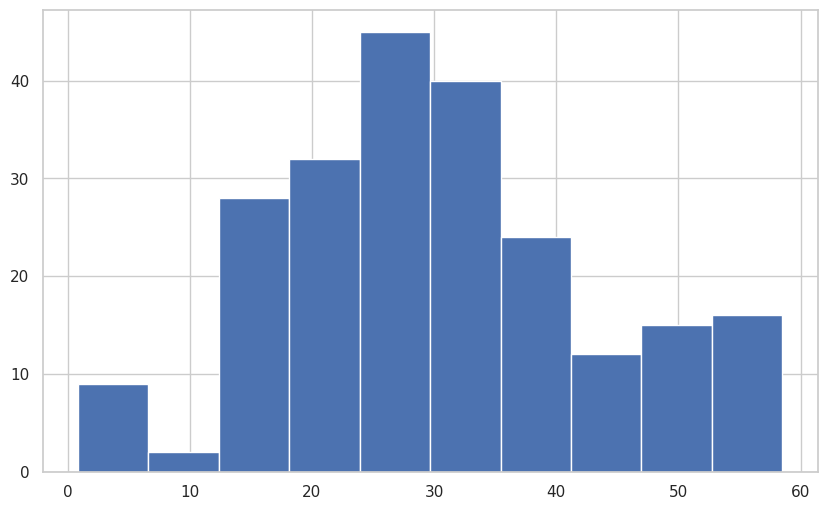

In [67]:
test_I.Age_zscore.hist()

## 7. Tratamiento de missings

In [68]:
# Trataiento de missings

featsTofill = [x + '_zscore' for x in numFeatures]

train_I[featsTofill] = train_I[featsTofill].fillna(train_I[featsTofill].median())
test_I[featsTofill]  = test_I[featsTofill].fillna(train_I[featsTofill].median())


## 8. Estandarización

In [69]:

#Estandarización de datos
variables = ['Age_zscore','Fare_zscore','SibSp_zscore','Parch_zscore', 'Pclass_coded', 'Sex_coded', 'Embarked_coded']

train_II = (train_I[variables] - train_I[variables].mean())/train_I[variables].std()
test_II  = (test_I[variables] - train_I[variables].mean())/train_I[variables].std()


## 9. Logistic Regression

In [70]:
#Variables para el modelo

numFeatures = ['Age_zscore','Fare_zscore','SibSp_zscore','Parch_zscore']
catFeatures = ['Pclass_coded', 'Sex_coded', 'Embarked_coded']

X_train = train_II[numFeatures + catFeatures]
X_test  = test_II[numFeatures + catFeatures]

y_train = train.Survived
y_test  = test.Survived



In [71]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit()

print(res.summary())


Optimization terminated successfully.
         Current function value: 0.444726
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3321
Time:                        15:15:54   Log-Likelihood:                -277.06
converged:                       True   LL-Null:                       -414.80
Covariance Type:            nonrobust   LLR p-value:                 1.037e-55
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6393      0.109     -5.842      0.000      -0.854      -0.425
Age_zscore       

In [73]:
actual_features = numFeatures + catFeatures
target = Survived

In [76]:
import copy

# Realizar una copia profunda de la lista
features_to_backward = copy.deepcopy(actual_features)

# Fit and summarize OLS model
lr = sm.Logit(train[target],
              sm.add_constant(train[features_to_backward]))
model = lr.fit()

while sum(model.pvalues > 0.05) >= 1:
  toRemove = pd.DataFrame(model.pvalues).idxmax(axis=0)[0]
  print(f'Retirando la variable: {toRemove}')
  features_to_backward.remove(toRemove)

  # Fit and summarize OLS model
  lr = sm.Logit(train[target],
            sm.add_constant(train[features_to_backward]))
  model = lr.fit()


Optimization terminated successfully.
         Current function value: 0.444726
         Iterations 6
Retirando la variable: Parch_zscore
Optimization terminated successfully.
         Current function value: 0.444806
         Iterations 6
Retirando la variable: Fare_zscore
Optimization terminated successfully.
         Current function value: 0.445375
         Iterations 6
Retirando la variable: SibSp_zscore
Optimization terminated successfully.
         Current function value: 0.447929
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.447929
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 May 2024   Pseudo R-squ.:             

In [85]:

# Fit and summarize OLS model
lr = sm.Logit(train[target],
              sm.add_constant(train[features_to_backward]))
model = lr.fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.447929
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      618
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 May 2024   Pseudo R-squ.:                  0.3272
Time:                        15:46:06   Log-Likelihood:                -279.06
converged:                       True   LL-Null:                       -414.80
Covariance Type:            nonrobust   LLR p-value:                 1.528e-57
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.9397      0.620     -7.968      0.000      -6.155      -3.725
Age_zscore       

In [77]:
# Analizando los parámetros del modelo

modelo = pd.DataFrame({'coeficiente' : res.params})
modelo.reset_index(inplace = True)
modelo.rename(columns = {'index': 'feature'}, inplace = True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = abs(modelo.coeficiente)/abs(modelo.coeficiente).sum()
modelo.sort_values(by = 'peso', ascending = False, inplace = True)
modelo


,feature,coeficiente,peso
2,Sex_coded,1.290077,0.437985
3,Pclass_coded,0.973210,0.330408
1,Age_zscore,-0.464987,0.157864
4,SibSp_zscore,-0.217207,0.073743


In [82]:
def wald_test_statmodels(model):
  coef = model.params
  cov_matrix = model.cov_params()
  wald_stat = np.square(coef)/np.diag(cov_matrix)
  total_wald_stat = np.sum(wald_stat[1:])

  weight = wald_stat[1:] / total_wald_stat
  return wald_stat, weight


In [84]:
wald_stat, weight = wald_test_statmodels(model)
weight

Age_zscore        0.060789
Pclass_coded      0.290358
Sex_coded         0.620932
Embarked_coded    0.027921
dtype: float64

In [ ]:
train[train.Sex == 'female']

## 10. Correlaciones

In [ ]:
X_train[mod_features].corr()

# 11. Performance

In [ ]:
# Usando el modelo para predecir

train_II['probability'] = res.predict(sm.add_constant(train_II[mod_features]))
test_II['probability']  = res.predict(sm.add_constant(test_II[mod_features]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

test_II['Survived'] = y_test


In [ ]:
sns.displot(test_II, x="probability", fill=True)

In [ ]:
sns.displot(test_II, x="probability", hue = 'Survived', kind="kde", fill=True)

Gini del modelo

In [ ]:
from sklearn.metrics import *

In [ ]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

In [ ]:
plot_roc_curve(y_test, test_II.probability, width=6, height=5)

In [ ]:
# AUC

print('TRAIN AUC: %f' %(roc_auc_score(y_train, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(y_test, test_II.probability)))


TRAIN AUC: 0.851740
TEST AUC: 0.859214


In [ ]:
# GINI

print('TRAIN GINI: %f' %(roc_auc_score(y_train, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(y_test, test_II.probability)*2-1))


TRAIN GINI: 0.703480
TEST GINI: 0.718427


In [ ]:
# Tablas cruzadas

pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total")

Survived,0,1,Total
prediction,,,
0,139,25,164
1,31,73,104
Total,170,98,268


In [ ]:
pd.crosstab(test_II.prediction, y_test, margins=True, margins_name="Total", normalize=True)

Survived,0,1,Total
prediction,,,
0,0.518657,0.093284,0.61194
1,0.115672,0.272388,0.38806
Total,0.634328,0.365672,1.00000


In [ ]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(y_train, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(y_test, test_II.prediction)))


TRAIN ACCURACY: 0.791332
TEST ACCURACY: 0.791045


In [ ]:
# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(y_train, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(y_test, test_II.prediction)))


TRAIN PRECISION: 0.745690
TEST PRECISION: 0.701923


In [ ]:
# RECALL

print('TRAIN RECALL: %f' %(recall_score(y_train, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(y_test, test_II.prediction)))


TRAIN RECALL: 0.709016
TEST RECALL: 0.744898


In [ ]:
# F1

print('TRAIN F1: %f' %(f1_score(y_train, train_II.prediction)))
print('TEST F1: %f' %(f1_score(y_test, test_II.prediction)))


TRAIN F1: 0.726891
TEST F1: 0.722772


In [ ]:
#Resumen de todas las métricas del modelo

metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y_train, train_II.probability),
                                        (roc_auc_score(y_train, train_II.probability)*2-1),
                                        accuracy_score(y_train, train_II.prediction),
                                        precision_score(y_train, train_II.prediction),
                                        recall_score(y_train, train_II.prediction),
                                        f1_score(y_train, train_II.prediction)],

                                'logistic_test':[roc_auc_score(y_test, test_II.probability),
                                        (roc_auc_score(y_test, test_II.probability)*2-1),
                                        accuracy_score(y_test, test_II.prediction),
                                        precision_score(y_test, test_II.prediction),
                                        recall_score(y_test, test_II.prediction),
                                        f1_score(y_test, test_II.prediction)]})

metricsLogisitc

<h3>Análisis de Predicción</h3>

In [ ]:

from sklearn.preprocessing import KBinsDiscretizer

test_II['probability_rank'] = KBinsDiscretizer(n_bins = 6,
                                              encode = 'ordinal',
                                              strategy = "uniform").fit_transform(test_II[['probability']])


In [ ]:
aggregations = {'prediction':'count','probability':'max','Survived':'mean'}
res = test_II.groupby('probability_rank').agg(aggregations).reset_index()

In [ ]:

pddf1 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.probability,
                     'type': 'probability_mean'})

pddf2 = pd.DataFrame({'probability_rank':test_II.probability_rank,
                      'value':test_II.Survived,
                     'type': 'Survived_rate'})

pddf = pddf1.append(pddf2)


In [ ]:
# Ratio del evento por tramo dela variable numérica

sns.lineplot(data=pddf.reset_index(), x="probability_rank", y="value", hue="type", markers=True, dashes=False)


## Elastic Net

In [ ]:
#Variables para el modelo

numFeatures = ['Age_zscore','Fare_zscore','SibSp_zscore','Parch_zscore']
catFeatures = ['Pclass_coded', 'Sex_coded', 'Embarked_coded']

X_train = train_II[numFeatures + catFeatures]
X_test  = test_II[numFeatures + catFeatures]

y_train = train.Survived
y_test  = test.Survived

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir el modelo de regresión logística

model = LogisticRegression(penalty = 'elasticnet',
                           solver='saga', # Método de optimización
                           max_iter=10000,
                           random_state=123)


In [ ]:

# Definir los rangos para C y l1_ratio
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Inversa de la fuerza de regularización (Desde 0.0001 hasta 10000)
    'l1_ratio': np.linspace(0, 1, 10)  # Elastic-Net mixing parameter (Desde 0 hasta 1 en 10 pasos)
    }


In [ ]:
# Crear la búsqueda en malla con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy', return_train_score = True, verbose=1)

# Ajustar el modelo con la búsqueda en malla
grid_search.fit(X_train, y_train)


In [ ]:
# Convertir los resultados en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Seleccionar columnas de interés
columns_of_interest = ['mean_test_score', 'mean_train_score', 'param_C', 'param_l1_ratio']
results = results[columns_of_interest]
results.sort_values(by = 'mean_test_score', ascending = False).head()

In [ ]:
# Modelo Elastic Net Final

from sklearn.linear_model import LogisticRegression

eltNet = LogisticRegression(penalty = 'elasticnet',
                            solver = 'saga',
                            C = 0.046416,
                            l1_ratio = 0.0,
                            max_iter = 10000,
                            random_state = 123)

eltNet.fit(X_train, y_train)

In [ ]:
# Modelo Regresión común para bentchmark

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(penalty = None,
                            random_state = 123)

logReg.fit(X_train, y_train)

In [ ]:
# Analizando los parámetros del modelo

paramLogistic   = pd.DataFrame({'feature': numFeatures + catFeatures,
                                'parámetro': logReg.coef_.ravel(),
                                'metod': 'logistic_reg'})

paramElasticNet = pd.DataFrame({'feature': numFeatures + catFeatures,
                                'parámetro': eltNet.coef_.ravel(),
                                'metod': 'elastic_net'})
paramElasticNet

In [ ]:
resumen = paramLogistic.append(paramElasticNet)

sns.barplot(x='feature', y='parámetro', hue='metod', data=resumen)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = eltNet.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = eltNet.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = eltNet.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = eltNet.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test


In [ ]:
#Resumen de todas las métricas del modelo

metricsElasticNet = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'ElasticNet_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'ElasticNet_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsElasticNet

In [ ]:
pdRes = pd.merge(metricsLogisitc, metricsElasticNet, on = 'metric', how='left')
pdRes

## Naive Bayes

In [ ]:
# Cargar Data
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Variables

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']

X = data[numFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
X_train.corr()

,Age_t,Fare_t,SibSp_t,Parch_t
Age_t,1.000000,0.104797,-0.184710,-0.163742
Fare_t,0.104797,1.000000,0.167693,0.236887
SibSp_t,-0.184710,0.167693,1.000000,0.434061
Parch_t,-0.163742,0.236887,0.434061,1.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)


In [ ]:
gnb.predict_proba(X_train[numFeatures])

array([[0.68313158, 0.31686842],
       [0.69047955, 0.30952045],
       [0.72529459, 0.27470541],
       ...,
       [0.7237841 , 0.2762159 ],
       [0.71873977, 0.28126023],
       [0.7167673 , 0.2832327 ]])

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = gnb.predict_proba(X_train[numFeatures])[:,1]
X_test['probability']  = gnb.predict_proba(X_test[numFeatures])[:,1]

X_train['prediction'] = gnb.predict(X_train[numFeatures])
X_test['prediction']  = gnb.predict(X_test[numFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsgnb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'gnb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'gnb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsgnb

,metric,gnb_train,gnb_test
0,AUC,0.674521,0.693097
1,Gini,0.349042,0.386194
2,Accuracy,0.685393,0.716418
3,Precision,0.744898,0.805556
4,Recall,0.299180,0.295918
5,F1-score,0.426901,0.432836


In [ ]:
pdRes = pd.merge(pdRes, metricsgnb, on = 'metric', how='left')
pdRes

,metric,logistic_train,logistic_test,ElasticNet_train,ElasticNet_test,gnb_train,gnb_test
0,AUC,0.853816,0.862185,0.761425,0.782833,0.674521,0.693097
1,Gini,0.707632,0.724370,0.522849,0.565666,0.349042,0.386194
2,Accuracy,0.791332,0.805970,0.566613,0.537313,0.685393,0.716418
3,Precision,0.761468,0.755556,0.472917,0.436893,0.744898,0.805556
4,Recall,0.680328,0.693878,0.930328,0.918367,0.299180,0.295918
5,F1-score,0.718615,0.723404,0.627072,0.592105,0.426901,0.432836


## Decision Tree

In [ ]:
data = pd.read_csv("train_titanic.csv")

In [ ]:
data[c] = data[c].replace(np.nan,'missing')


In [ ]:

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
# Target Encoding
from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)



In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 3,
                               min_samples_leaf = 0.03,
                               min_samples_split = 0.1,
                               #class_weight = {andom_state = 1230:y_train.mean(),1:1},
                               r)
dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.03,
                       min_samples_split=0.1, random_state=123)

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = dtree.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = dtree.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsDtree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree

In [ ]:
pd.merge(metricsLogisitc, metricsDtree, on = 'metric', how='left')

### Gracias por completar este laboratorio!

---

